In [49]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.datasets import make_regression
from tensorflow.keras.datasets import boston_housing

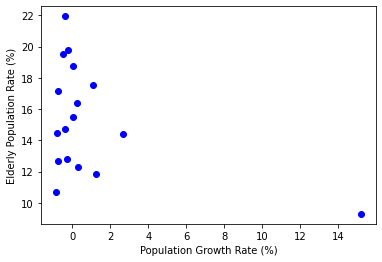

In [4]:
population_inc = [0.3, -0.78, 1.26, 0.03, 1.11, 15.17, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, 
-0.27, 0.02, -0.76, 2.66]
population_old = [12.27, 14.44, 11.87, 18.75, 17.52, 9.29, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 
21.94, 12.83, 15.51, 17.14, 14.42]
plt.plot(population_inc,population_old,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

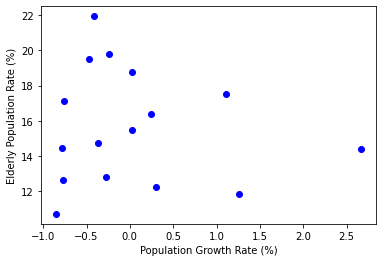

In [5]:
population_inc = population_inc[:5] + population_inc[6:]
population_old = population_old[:5] + population_old[6:]
plt.plot(population_inc,population_old,'bo')

plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

In [ ]:
X = population_inc
Y = population_old
x_bar = sum(X) / len(X)
y_bar = sum(Y) / len(Y)

a = sum([(y - y_bar) * (x - x_bar) for y, x in list(zip(Y,X))])
a /= sum([(x - x_bar) ** 2for x in X])
b = y_bar - a * x_bar

line_x = np.arrange(min(X), max(X), 0.01)
line_y = a * line_x + b

plt.plot(line_x, line_y, 'r-')
plt.plot(X, Y, 'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

99 a: 3.9611268 b: -5.7937965 c: 6.7298665 loss: 65.36358
199 a: 2.6195612 b: -4.3904257 c: 10.586853 loss: 29.401775
299 a: 1.1233679 b: -2.110866 c: 13.189931 loss: 15.020629
399 a: 0.21259734 b: -0.71460253 c: 14.758137 loss: 10.6377325
499 a: -0.25238517 b: -0.0021190206 c: 15.560104 loss: 9.646879
599 a: -0.45536926 b: 0.30888543 c: 15.910294 loss: 9.479472
699 a: -0.53141874 b: 0.42540434 c: 16.041498 loss: 9.45827
799 a: -0.55590117 b: 0.46291375 c: 16.083742 loss: 9.456259
899 a: -0.56266063 b: 0.47327077 c: 16.095402 loss: 9.456118
999 a: -0.5642543 b: 0.47571218 c: 16.09815 loss: 9.456111


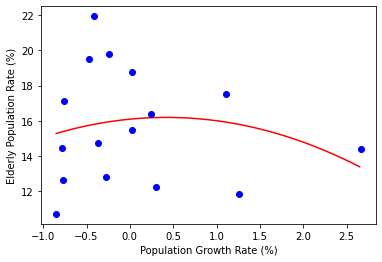

In [11]:
a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())

def function(X):
    y_pred = a* X*X + b*X +c
    return y_pred

#MSE
def compute_loss():
    y_pred = function(X)
    loss = tf.reduce_mean((Y - y_pred) **2)
    return loss

optimizer = tf.keras.optimizers.Adam(lr=0.07)

for i in range(1000):
    optimizer.minimize(compute_loss, var_list=[a,b,c])
    if i % 100 == 99:
        print(i, 'a:',a.numpy(),'b:',b.numpy(),'c:',c.numpy(),'loss:',compute_loss().numpy())

line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x* line_x + b* line_x+c

plt.plot(line_x, line_y, 'r-')
plt.plot(X, Y, 'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=6, activation='tanh', input_shape=(1,)),
    tf.keras.layers.Dense(units=1)# regrassion 문제는 아웃풋에 activation func 넣지않음
])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1), loss='mse')

model.fit(X, Y, epochs = 10)
model.summary()

Epoch 1/10
1/1 [==============================] - 0s 305ms/step - loss: 254.2422
Epoch 2/10
1/1 [==============================] - 0s 4ms/step - loss: 115.9148
Epoch 3/10
1/1 [==============================] - 0s 3ms/step - loss: 10.7421
Epoch 4/10
1/1 [==============================] - 0s 3ms/step - loss: 9.8172
Epoch 5/10
1/1 [==============================] - 0s 4ms/step - loss: 9.6594
Epoch 6/10
1/1 [==============================] - 0s 3ms/step - loss: 9.6099
Epoch 7/10
1/1 [==============================] - 0s 3ms/step - loss: 9.5823
Epoch 8/10
1/1 [==============================] - 0s 3ms/step - loss: 9.5611
Epoch 9/10
1/1 [==============================] - 0s 3ms/step - loss: 9.5416
Epoch 10/10
1/1 [==============================] - 0s 5ms/step - loss: 9.5214
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 12        
____

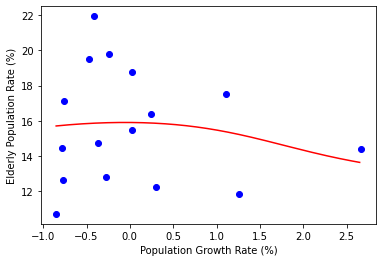

In [13]:
line_x = np.arange(min(X), max(X), 0.01)
line_y = model.predict(line_x)

plt.plot(line_x, line_y, 'r-')
plt.plot(X, Y, 'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

(1000,)
(1000,)


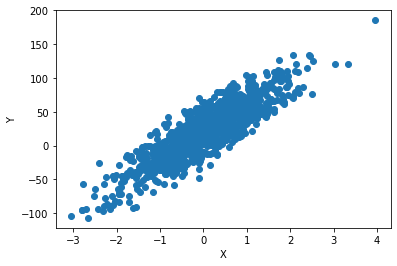

In [22]:
X, Y = make_regression(n_samples=1000, n_features=1, bias=20.0,noise=20.0,  random_state=1)
X = np.squeeze(X)
print(X.shape)
print(Y.shape)
plt.scatter(X, Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### Linear Regression

In [24]:
a = tf.Variable(random.random())
b = tf.Variable(random.random())

def function(X):
    y_pred = a* X + b
    return y_pred

#MSE
def compute_loss():
    y_pred = function(X)
    loss = tf.reduce_mean((Y - y_pred) **2)
    return loss

optimizer = tf.keras.optimizers.Adam(lr=0.07)

for i in range(1000): #조금만 더 돌리면 더 좋은 값이 나올 수 있을 것 같다.
    optimizer.minimize(compute_loss, var_list=[a,b])
    if i % 100 == 99:
        print(i, 'a:',a.numpy(),'b:',b.numpy(),'loss:',compute_loss().numpy())

line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x + b

99 a: 7.5513296 b: 6.599591 loss: 1539.2125
199 a: 13.614757 b: 11.854271 loss: 1079.773
299 a: 18.929441 b: 15.695326 loss: 792.87274
399 a: 23.480282 b: 18.214403 loss: 620.3855
499 a: 27.273445 b: 19.663393 loss: 519.5061
599 a: 30.339886 b: 20.374111 loss: 462.18344
699 a: 32.73597 b: 20.653248 loss: 430.9487
799 a: 34.540092 b: 20.721018 loss: 414.88684
899 a: 35.845802 b: 20.70607 loss: 407.18564
999 a: 36.752365 b: 20.670444 loss: 403.768


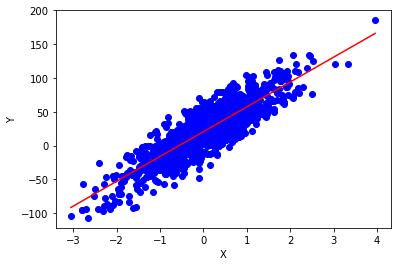

In [27]:
plt.plot(X, Y, 'bo')
plt.plot(line_x, line_y, 'r-')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### Neural Network

In [46]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=6, activation='sigmoid', input_shape=(1,)),
    tf.keras.layers.Dense(units=1)# regrassion 문제는 아웃풋에 activation func 넣지않음
])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1), loss='mse')

model.fit(X, Y, epochs = 20, verbose=0)
history = model.fit(X, Y, epochs=20, verbose=2)
model.summary()

Epoch 1/20
32/32 - 0s - loss: 506.8249
Epoch 2/20
32/32 - 0s - loss: 473.0823
Epoch 3/20
32/32 - 0s - loss: 470.7219
Epoch 4/20
32/32 - 0s - loss: 471.4242
Epoch 5/20
32/32 - 0s - loss: 476.1375
Epoch 6/20
32/32 - 0s - loss: 465.6320
Epoch 7/20
32/32 - 0s - loss: 466.9428
Epoch 8/20
32/32 - 0s - loss: 469.3994
Epoch 9/20
32/32 - 0s - loss: 465.5758
Epoch 10/20
32/32 - 0s - loss: 471.0990
Epoch 11/20
32/32 - 0s - loss: 461.6807
Epoch 12/20
32/32 - 0s - loss: 459.2560
Epoch 13/20
32/32 - 0s - loss: 456.0635
Epoch 14/20
32/32 - 0s - loss: 459.1830
Epoch 15/20
32/32 - 0s - loss: 465.5524
Epoch 16/20
32/32 - 0s - loss: 462.3612
Epoch 17/20
32/32 - 0s - loss: 457.0611
Epoch 18/20
32/32 - 0s - loss: 474.5235
Epoch 19/20
32/32 - 0s - loss: 448.0881
Epoch 20/20
32/32 - 0s - loss: 457.9958
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 6)                 

In [35]:
history = model.fit(X, Y, epochs=20, verbose=2)

Epoch 1/20
32/32 - 0s - loss: 651.4005
Epoch 2/20
32/32 - 0s - loss: 673.2780
Epoch 3/20
32/32 - 0s - loss: 651.8051
Epoch 4/20
32/32 - 0s - loss: 661.4707
Epoch 5/20
32/32 - 0s - loss: 659.3401
Epoch 6/20
32/32 - 0s - loss: 654.0159
Epoch 7/20
32/32 - 0s - loss: 658.4534
Epoch 8/20
32/32 - 0s - loss: 662.2974
Epoch 9/20
32/32 - 0s - loss: 657.5247
Epoch 10/20
32/32 - 0s - loss: 650.7352
Epoch 11/20
32/32 - 0s - loss: 654.3561
Epoch 12/20
32/32 - 0s - loss: 671.7924
Epoch 13/20
32/32 - 0s - loss: 659.2916
Epoch 14/20
32/32 - 0s - loss: 642.0121
Epoch 15/20
32/32 - 0s - loss: 648.2622
Epoch 16/20
32/32 - 0s - loss: 657.2310
Epoch 17/20
32/32 - 0s - loss: 659.1030
Epoch 18/20
32/32 - 0s - loss: 659.7076
Epoch 19/20
32/32 - 0s - loss: 651.9620
Epoch 20/20
32/32 - 0s - loss: 659.0104


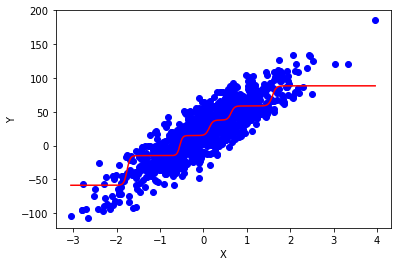

In [47]:
line_x = np.arange(min(X), max(X), 0.01)
line_y = model.predict(line_x)

plt.plot(X, Y, 'bo')
plt.plot(line_x, line_y, 'r-')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
#일반화의 관점에서는 Linear가 더 좋다고 할 수 있다. 너무 꼬불꼬불해서 오버피팅이라고 할 수 있음
#이것을 통해서 이런 데이터에서는 간단하게 Linear가 더 적합하다고 생각 할 수 있다.


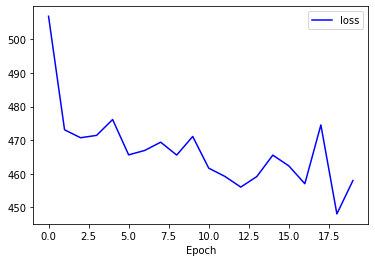

In [48]:
plt.plot(history.history['loss'],'b-', label='loss')
plt.xlabel('Epoch')
plt.legend()
# Loss값이 줄어들면서 삐죽빼죽해야대는데 Epoch 횟수가 적으면 이상하다.

In [51]:
# 데이터 불러오기
(train_X, train_Y), (test_X, test_Y) = boston_housing.load_data()
print(len(train_X), len(test_X))
print(train_X[0])
print(train_Y[0])

404 102
[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
15.2


In [52]:
#데이터 전처리(정규화) Standard scaler
x_mean = train_X.mean(axis=0)
x_std = train_X.std(axis=0)
train_X -= x_mean
train_X /= x_std
test_X -= x_mean
test_X /= x_std

y_mean = train_Y.mean(axis=0)
y_std = train_Y.std(axis=0)
train_Y -= y_mean
train_Y /= y_std
test_Y -= y_mean
test_Y /= y_std

print(train_X[0])
print(train_Y[0])
# W를 구하기 위한 학습데이터이므로 음수 값이 나와도 상관없음

[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]
-0.7821526033779157


In [63]:
# Boston Housing Dataset 회귀 모델 생성
tf.random.set_seed(0)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(units=39, activation='relu'),
    tf.keras.layers.Dense(units=26, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='mse')

model.summary()
history = model.fit(train_X, train_Y, epochs=25,batch_size=32, validation_split=0.25)
#validation data는 train data가 잘되어있는지 확인하는 거임 (오버피팅이 나는지)검증이나 튜닝 
# 검증이 잘 되었다고 하면 test data 확인 (25%사용)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 52)                728       
_________________________________________________________________
dense_27 (Dense)             (None, 39)                2067      
_________________________________________________________________
dense_28 (Dense)             (None, 26)                1040      
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 27        
Total params: 3,862
Trainable params: 3,862
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
10/10 [==============================] - 0s 18ms/step - loss: 2.8044 - val_loss: 0.8600
Epoch 2/25
10/10 [==============================] - 0s 5ms/step - loss: 0.5507 - val_loss: 0.5094
Epoch 3/25
10/10 [==============================] - 

['loss']
4/4 [==============================] - 0s 999us/step - loss: 0.2285


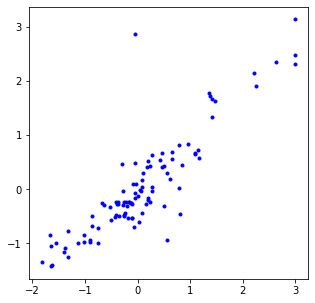

In [65]:
# 회귀 모델 평가
print(model.metrics_names)
model.evaluate(test_X, test_Y)

#실제 주택 가격과 예측 주택 가격 시각화
pred_Y = model.predict(test_X)

plt.figure(figsize = (5,5))
plt.plot(test_Y, pred_Y, 'b.')
plt.show()

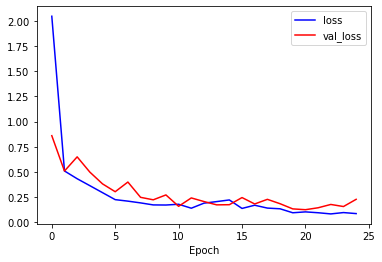

In [66]:
# 회귀 모델 학습 결과 시각화
plt.plot(history.history['loss'],'b-', label='loss')
plt.plot(history.history['val_loss'],'r-', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 52)                728       
_________________________________________________________________
dense_31 (Dense)             (None, 39)                2067      
_________________________________________________________________
dense_32 (Dense)             (None, 26)                1040      
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 27        
Total params: 3,862
Trainable params: 3,862
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
10/10 [==============================] - 1s 29ms/step - loss: 2.8044 - val_loss: 0.8600
Epoch 2/25
10/10 [==============================] - 0s 5ms/step - loss: 0.5507 - val_loss: 0.5094
Epoch 3/25
10/10 [==============================] - 

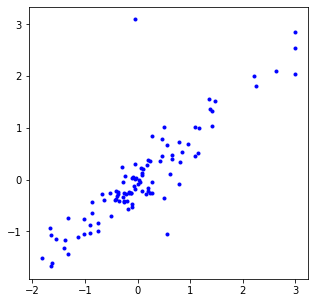

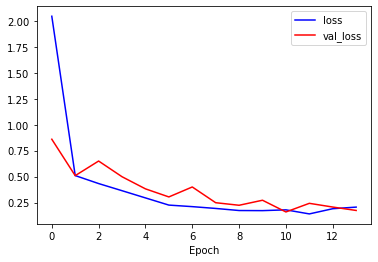

In [67]:
# Boston Housing Dataset  EarlyStopping 실습
tf.random.set_seed(0)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(units=39, activation='relu'),
    tf.keras.layers.Dense(units=26, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='mse')

model.summary()
history = model.fit(train_X, train_Y, epochs=25,batch_size=32, validation_split=0.25,
                   callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss')])

print(model.metrics_names)
model.evaluate(test_X, test_Y)

#실제 주택 가격과 예측 주택 가격 시각화
pred_Y = model.predict(test_X)

plt.figure(figsize = (5,5))
plt.plot(test_Y, pred_Y, 'b.')
plt.show()
# 회귀 모델 학습 결과 시각화
plt.plot(history.history['loss'],'b-', label='loss')
plt.plot(history.history['val_loss'],'r-', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()